<a href="https://colab.research.google.com/github/Mkr-mayank/CNN/blob/main/Prediction_Using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
dataset_path = '/content/drive/MyDrive/Dataset4'
IMG_SIZE = 64
BATCH_SIZE = 64

In [4]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    class_mode='sparse',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=(IMG_SIZE, IMG_SIZE),
    batch_size=64,
    class_mode='sparse',
    subset='validation'
)

Found 21757 images belonging to 10 classes.
Found 5434 images belonging to 10 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')  # Adjust this based on your dataset's number of classes
])

In [6]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 128)       36992     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       147584    
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [8]:
history = model.fit(
    train_gen,
    epochs=5,
    validation_data=val_gen
)

Epoch 1/5
340/340 [==============================] - 6843s 20s/step - loss: 1.4017 - accuracy: 0.4834 - val_loss: 1.6706 - val_accuracy: 0.3658
Epoch 2/5
340/340 [==============================] - 552s 2s/step - loss: 1.1086 - accuracy: 0.5788 - val_loss: 1.6646 - val_accuracy: 0.3855
Epoch 3/5
340/340 [==============================] - 547s 2s/step - loss: 1.0068 - accuracy: 0.6102 - val_loss: 1.7152 - val_accuracy: 0.4216
Epoch 4/5
340/340 [==============================] - 545s 2s/step - loss: 0.9487 - accuracy: 0.6331 - val_loss: 1.6235 - val_accuracy: 0.4395
Epoch 5/5
340/340 [==============================] - 546s 2s/step - loss: 0.8903 - accuracy: 0.6523 - val_loss: 1.8138 - val_accuracy: 0.4179


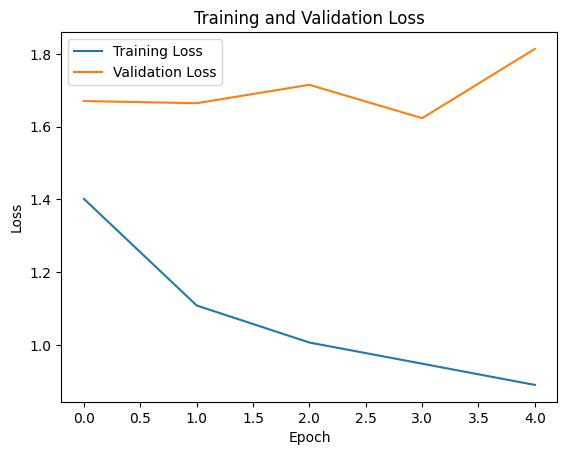

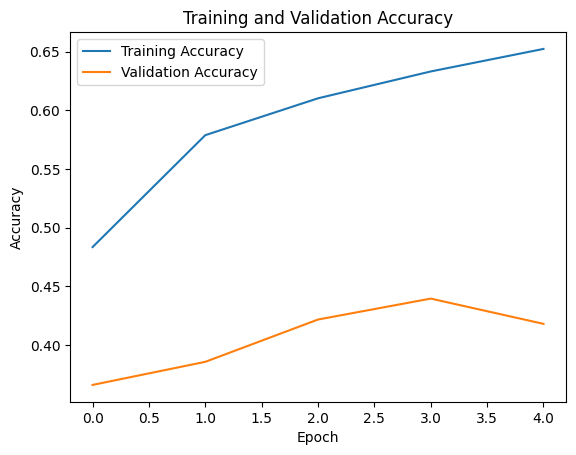

85/85 [==============================] - 75s 875ms/step - loss: 1.8138 - accuracy: 0.4179
Validation Loss: 1.813843846321106
Validation Accuracy: 0.4179241955280304
85/85 [==============================] - 73s 855ms/step
F1 Score: 0.14428949279299005
Precision: 0.14932094582016003
Recall: 0.1494295178505705


In [11]:
# import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, f1_score, precision_score, recall_score

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot accuracy curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(val_gen)
print("Validation Loss:", loss)
print("Validation Accuracy:", accuracy)

# Predict labels
y_pred = model.predict(val_gen)
y_pred = np.argmax(y_pred, axis=1)

# True labels
y_true = val_gen.classes

# F1 Score, Precision, Recall
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

print("F1 Score:", f1)
print("Precision:", precision)
print("Recall:", recall)
